### Problem Statement
Signature is one of the most popular and commonly accepted biometric hallmarks that has been used since the ancient times for verifying different entities related to human beings, viz. documents, forms, bank checks, individuals, etc. Therefore, signature verification is a critical task and many efforts have been made to remove the uncertainty involved in the manual authentication procedure, which makes signature verification an important research line in the field of machine learning and pattern recognition. 


In this notebook, we model a writer independent **signature verification** task with a **convolutional Siamese network**.



In [38]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import itertools
import random

from sklearn.utils import shuffle

import tensorflow as tf

### Dataset Links:

https://drive.google.com/open?id=0B29vNACcjvzVc1RfVkg5dUh2b1E

### About the Dataset:


The BHSig260 signature dataset contains the signatures of 260 persons, among them 100 were signed in Bengali and 160 are signed in Hindi. 

For each of the signers, 24 genuine and 30 forged signatures are available. This results in 100 × 24 = 2, 400 genuine and 100 × 30 = 3, 000 forged signatures in Bengali, and 160 × 24 = 3, 840 genuine and 160×30 = 4, 800 forged signatures in Hindi.

In this task we are considering only Hindi singatures for easeness. 


**Paper Link:**  https://arxiv.org/pdf/1707.02131.pdf

In [2]:
!pip install googledrivedownloader

In [3]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='0B29vNACcjvzVc1RfVkg5dUh2b1E',
                                    dest_path='./BHSig260.zip',
                                    unzip=True)

Unzipping...Done.


In [39]:
!ls -l

total 844832
drwxr-xr-x   4 sumo  staff        128 Dec  4 21:31 101_ObjectCategories
-rw-r--r--@  1 sumo  staff  128372777 Dec  4 21:30 101_ObjectCategories.zip
drwxr-xr-x   4 sumo  staff        128 Dec  5 23:08 BHSig260
-rw-r--r--   1 sumo  staff   48500114 Dec  5 23:08 BHSig260.zip
-rw-r--r--   1 sumo  staff      61186 Dec  4 23:40 CreatingModelAndDeployingWithTFserving.ipynb
-rw-r--r--@  1 sumo  staff     183564 Dec  4 22:52 ExerciseForAdvDLBatch-Objectdetection_upadtesWith class.ipynb
-rw-r--r--   1 sumo  staff       5263 Dec  5 23:05 FaceRecognition-Play.ipynb
-rw-r--r--@  1 sumo  staff    5641366 Dec  5 12:28 Object_detection.ipynb
-rw-r--r--@  1 sumo  staff      82774 Dec 11 19:50 Siamese Network _ SigNet BHSig260 Hindi Signatures-forAdvDLClass.ipynb
-rw-r--r--   1 sumo  staff        588 Dec  4 19:12 Untitled.ipynb
-rw-r--r--@  1 sumo  staff     257529 Dec  4 21:16 Yolo-Exrecise-class-WIth-Full-Yolov3_completed.ipynb
drwxr-xr-x   6 sumo  staff        192 Dec  5 22:14 data
drwxr-

In [40]:
!ls -l BHSig260

total 0
drwxr-xr-x  105 sumo  staff  3360 Dec  5 23:08 Bengali
drwxr-xr-x  165 sumo  staff  5280 Dec  5 23:08 Hindi


In [41]:
!ls -l BHSig260/Hindi/001

total 29864
-rw-r--r--  1 sumo  staff  278048 Dec  5 23:08 H-S-1-F-01.tif
-rw-r--r--  1 sumo  staff  278048 Dec  5 23:08 H-S-1-F-02.tif
-rw-r--r--  1 sumo  staff  290756 Dec  5 23:08 H-S-1-F-03.tif
-rw-r--r--  1 sumo  staff  276374 Dec  5 23:08 H-S-1-F-04.tif
-rw-r--r--  1 sumo  staff  277570 Dec  5 23:08 H-S-1-F-05.tif
-rw-r--r--  1 sumo  staff  288976 Dec  5 23:08 H-S-1-F-06.tif
-rw-r--r--  1 sumo  staff  274136 Dec  5 23:08 H-S-1-F-07.tif
-rw-r--r--  1 sumo  staff  274136 Dec  5 23:08 H-S-1-F-08.tif
-rw-r--r--  1 sumo  staff  294131 Dec  5 23:08 H-S-1-F-09.tif
-rw-r--r--  1 sumo  staff  279026 Dec  5 23:08 H-S-1-F-10.tif
-rw-r--r--  1 sumo  staff  279026 Dec  5 23:08 H-S-1-F-11.tif
-rw-r--r--  1 sumo  staff  293100 Dec  5 23:08 H-S-1-F-12.tif
-rw-r--r--  1 sumo  staff  278048 Dec  5 23:08 H-S-1-F-13.tif
-rw-r--r--  1 sumo  staff  278332 Dec  5 23:08 H-S-1-F-14.tif
-rw-r--r--  1 sumo  staff  290288 Dec  5 23:08 H-S-1-F-15.tif
-rw-r--r--  1 sumo  staff  275395 Dec  5 23:08 H-S-1-F-16.

### Considering only Hindi signatures from the dataset.

In [42]:
path = "./BHSig260/Hindi/"

In [43]:
# Get the list of all directories and sort them
dir_list = next(os.walk(path))[1]
dir_list.sort()

In [44]:
dir_list

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',


In [45]:
# For each person segregate the genuine signatures from the forged signatures
# Genuine signatures are stored in the list "orig_groups"
# Forged signatures are stored in the list "forged_groups"
orig_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir(path+directory)
    images.sort()
    images = [path+directory+'/'+x for x in images]
    forg_groups.append(images[:30]) # First 30 signatures in each folder are forged
    orig_groups.append(images[30:]) # Next 24 signatures are genuine

In [46]:
# Quick check to confirm we have data of all the 160 individuals
len(orig_groups), len(forg_groups)

(160, 160)

In [47]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]

In [48]:
# Quick check to confirm that there are 24 Genuine signatures for each individual
print(orig_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


In [49]:
# Quick check to confirm that there are 30 Forged signatures for each individual
print(forg_lengths)

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


#### Train-Validation-Test Split
* Signatures of 120 people are used for training
* Signatures of 20 people are used for validation
* Signatures of 20 people are used for testing

In [50]:
orig_train, orig_val, orig_test = orig_groups[:120], orig_groups[120:140], orig_groups[140:]
forg_train, forg_val, forg_test = forg_groups[:120], forg_groups[120:140], forg_groups[140:]

In [51]:
# Delete unnecessary variables
del orig_groups, forg_groups

In [52]:
# All the images will be converted to the same size before processing
img_h, img_w = 155, 220

In [53]:
def visualize_sample_signature():
    '''Function to randomly select a signature from train set and
    print two genuine copies and one forged copy'''
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 10))
    k = np.random.randint(len(orig_train))
    orig_img_names = random.sample(orig_train[k], 2)
    forg_img_name = random.sample(forg_train[k], 1)
    orig_img1 = cv2.imread(orig_img_names[0], 0)
    orig_img2 = cv2.imread(orig_img_names[1], 0)
    forg_img = cv2.imread(forg_img_name[0], 0)
    orig_img1 = cv2.resize(orig_img1, (img_w, img_h))
    orig_img2 = cv2.resize(orig_img2, (img_w, img_h))
    forg_img = cv2.resize(forg_img, (img_w, img_h))

    ax1.imshow(orig_img1, cmap = 'gray')
    ax2.imshow(orig_img2, cmap = 'gray')
    ax3.imshow(forg_img, cmap = 'gray')

    ax1.set_title('Genuine Copy')
    ax1.axis('off')
    ax2.set_title('Genuine Copy')
    ax2.axis('off')
    ax3.set_title('Forged Copy')
    ax3.axis('off')

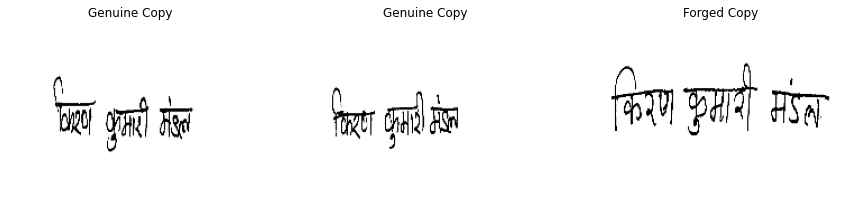

In [54]:
visualize_sample_signature()

In [64]:
def generate_batch(orig_groups, forg_groups, batch_size = 32):
    '''Function to generate a batch of data with batch_size number of data points
    Half of the data points will be Genuine-Genuine pairs and half will be Genuine-Forged pairs'''
    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []
        
        # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 24 genuine signatures, hence we have 
        # 24 choose 2 = 276 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 24 * 12 = 300 Genuine-Forged image pairs for one person.
        # In all we have 120 person's data in the training data.
        # Total no. of Genuine-Genuine pairs = 120 * 276 = 33120
        # Total number of Genuine-Forged pairs = 120 * 300 = 36000
        # Total no. of data points = 33120 + 36000 = 69120
        for orig, forg in zip(orig_groups, forg_groups):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
                forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, 12))))
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)
        
        # Note the lists above contain only the image names and
        # actual images are loaded and yielded below in batches
        # Below we prepare a batch of data points and yield the batch
        # In each batch we load "batch_size" number of image pairs
        # These images are then removed from the original set so that
        # they are not added again in the next batch.
            
        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]
        targets=np.zeros((batch_size,))
        for ix, pair in enumerate(all_pairs):
            img1 = cv2.imread(pair[0], 0)
            img2 = cv2.imread(pair[1], 0)
            img1 = cv2.resize(img1, (img_w, img_h))
            img2 = cv2.resize(img2, (img_w, img_h))
            img1 = np.array(img1, dtype = np.float64)
            img2 = np.array(img2, dtype = np.float64)
            img1 /= 255
            img2 /= 255
            img1 = img1[..., np.newaxis]
            img2 = img2[..., np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]
            k += 1
            if k == batch_size:
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]
                targets=np.zeros((batch_size,))

In [67]:
def euclidean_distance(vects):
    '''Compute Euclidean Distance between two vectors'''
    x, y = vects
    return tf.keras.backend.sqrt(tf.keras.backend.sum(tf.keras.backend.square(x-y), axis=1, keepdims=True))

In [68]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return(shape1[0],1)

In [69]:
def contrastive_loss(y_true, y_pred):

    # y_pred : Eucledean distance for each pair of images
    # y_true : 1 for Genuine-genuine pair, 0 otherwise
    '''Contrastive loss from Hadsell-et-al.'06
    Source: http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    
    Explanation:
    When ytrue is 1, that means the sample are duplicates of each other, 
    so the Euclidean distance (ypred) between their outputs must be minimized.
    So the loss is taken as the square of that Euclidean distance itself - square(y_pred).
    When ytrue is 0, i.e. the samples are not duplicates, then the Euclidean distance 
    between them must be maximized, at least to the margin. So the loss to be minimized
    is the difference of the margin and the Euclidean distance - (margin - y_pred).
    If the Euclidean distance (ypred) is already greater than the margin, 
    then nothing is to be learned, so the loss is made to be zero in 
    that case by saying maximum(margin - y_pred, 0).
    '''
    margin = 1
    return tf.keras.backend.mean(y_true * tf.keras.backend.square(y_pred)+ (1-y_true)*tf.keras.backend.square(tf.keras.backend.maximum(margin-y_pred,0)))

In [70]:
def create_base_network_signet(input_shape):
    
    '''Base Siamese Network'''
    seq = tf.keras.models.Sequential()
    seq.add(tf.keras.layers.Conv2D(96,kernel_size=(11,11), activation='relu', name='conv1_1', strides=4, input_shape=input_shape))
    seq.add(tf.keras.layers.BatchNormalization())
    seq.add(tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)))
    seq.add(tf.keras.layers.ZeroPadding2D((2,2)))
    
    seq.add(tf.keras.layers.Conv2D(256,kernel_size=(5,5), activation='relu', name='conv2_1', input_shape=input_shape))
    seq.add(tf.keras.layers.BatchNormalization())
    seq.add(tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)))
    seq.add(tf.keras.layers.Dropout(0.3))
    seq.add(tf.keras.layers.ZeroPadding2D((1,1)))
    
    seq.add(tf.keras.layers.Conv2D(384,kernel_size=(3,3), activation='relu', name='conv3_1', input_shape=input_shape))
    seq.add(tf.keras.layers.ZeroPadding2D((1,1)))
    seq.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3), activation='relu', name='conv3_2', input_shape=input_shape))
    seq.add(tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)))
    seq.add(tf.keras.layers.Dropout(0.3))
    
    #feature extraction complete
    
    seq.add(tf.keras.layers.Flatten(name='flatten'))
    seq.add(tf.keras.layers.Dense(1024, activation='relu'))
    seq.add(tf.keras.layers.Dropout(0.5))
    seq.add(tf.keras.layers.Dense(128, activation='relu'))
    
    return seq
    

In [71]:
input_shape=(img_h, img_w, 1)

In [72]:
tf.keras.backend.clear_session()

# network definition
base_network = create_base_network_signet(input_shape)

input_a = tf.keras.layers.Input(shape=(input_shape))
input_b = tf.keras.layers.Input(shape=(input_shape))

# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Compute the Euclidean distance between the two vectors in the latent space
distance = tf.keras.layers.Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = tf.keras.Model([input_a, input_b], distance)

In [73]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 155, 220, 1) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 155, 220, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 128)          6462272     input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           sequential[0][0]             

In [ ]:
batch_sz = 128
num_train_samples = 276*120 + 300*120
num_val_samples = num_test_samples = 276*20 + 300*20
num_train_samples, num_val_samples, num_test_samples

In [ ]:
# compile model using RMSProp Optimizer and Contrastive loss function defined above


In [ ]:
# Using Keras Callbacks, save the model after every epoch
# Reduce the learning rate by a factor of 0.1 if the validation loss does not improve for 5 epochs
# Stop the training using early stopping if the validation loss does not improve for 12 epochs
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=12, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('./signet-bhsig260-{epoch:03d}.h5', verbose=1, save_weights_only=True)
]

In [ ]:
train_generator = generate_batch(orig_train, forg_train, batch_sz)
test_generator = generate_batch(orig_val, forg_val, batch_sz)

In [ ]:
!ls -l

### Accuracy and Threshold

In [ ]:
def compute_accuracy_thresh(predictions, labels):
    '''Compute accuracy with a range of thresholds on distances.
    '''
    dmax = np.max(predictions)
    dmin = np.min(predictions)
    nsame = np.sum(labels == 1)
    ndiff = np.sum(labels == 0)
   
    step = 0.01
    max_acc = 0
    best_thresh = -1
   
    for d in np.arange(dmin, dmax+step, step):
        idx1 = predictions.ravel() <= d
        idx2 = predictions.ravel() > d
       
        tpr = float(np.sum(labels[idx1] == 1)) / nsame       
        tnr = float(np.sum(labels[idx2] == 0)) / ndiff
        acc = 0.5 * (tpr + tnr)       
             
        if (acc > max_acc):
            max_acc, best_thresh = acc, d
           
    return max_acc, best_thresh

#### Load the weights from the epoch which gave the best validation accuracy

In [ ]:
model.load_weights('./signet-bhsig260-001.h5')

In [ ]:
test_gen = generate_batch(orig_test, forg_test, 1)
pred, tr_y = [], []
for i in range(num_test_samples):
    (img1, img2), label = next(test_gen)
    tr_y.append(label)
    pred.append(model.predict([img1, img2])[0][0])

In [ ]:
tr_acc, threshold = compute_accuracy_thresh(np.array(pred), np.array(tr_y))
tr_acc, threshold

#### Review Results
Thus if the differnce score is less than threhold, we predict the test image as Genuine and if the difference score is greater than threshold, we predict it to be as forged

In [ ]:
def predict_score():
    '''Predict distance score and classify test images as Genuine or Forged'''
    test_point, test_label = next(test_gen)
    img1, img2 = test_point[0], test_point[1]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')
    ax1.set_title('Genuine')
    if test_label == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score = ", diff)
    if diff > threshold:
        print("Its a Forged Signature")
    else:
        print("Its a Genuine Signature")

In [ ]:
predict_score()

### Note: The first image is always Genuine. Score prediction and classification is done for the second image

In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()